# Titanic Dataset - Exploratory Data Analysis
**Task 5: Data Analyst Internship**

**Objective:** Extract insights using visual and statistical exploration
**Tools:** Python (Pandas, Matplotlib, Seaborn)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
print("Libraries imported successfully!")

Libraries imported successfully!


In [4]:
# Load the dataset
df = pd.read_csv('train.csv')

print("Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")

Dataset loaded successfully!
Dataset shape: (891, 12)


## A. Basic Statistical Exploration
Using .describe(), .info(), .value_counts()

In [5]:
# a. .describe() - Statistical summary
print("=== BASIC STATISTICS (.describe()) ===")
print(df.describe())

print("\n=== CATEGORICAL STATISTICS ===")
print(df.describe(include=['O']))

=== BASIC STATISTICS (.describe()) ===
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  

=== CATEGORICAL STATISTICS ===
          

In [6]:
# a. .info() - Dataset information
print("=== DATASET INFORMATION (.info()) ===")
df.info()

=== DATASET INFORMATION (.info()) ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# a. .value_counts() - Categorical distributions
print("=== SURVIVED VALUE COUNTS ===")
print(df['Survived'].value_counts())
print("\n=== PCLASS VALUE COUNTS ===")
print(df['Pclass'].value_counts())
print("\n=== SEX VALUE COUNTS ===")
print(df['Sex'].value_counts())
print("\n=== EMBARKED VALUE COUNTS ===")
print(df['Embarked'].value_counts())

=== SURVIVED VALUE COUNTS ===
Survived
0    549
1    342
Name: count, dtype: int64

=== PCLASS VALUE COUNTS ===
Pclass
3    491
1    216
2    184
Name: count, dtype: int64

=== SEX VALUE COUNTS ===
Sex
male      577
female    314
Name: count, dtype: int64

=== EMBARKED VALUE COUNTS ===
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


## B. Multivariate Visualizations
Using sns.pairplot() and sns.heatmap()

=== PAIRPLOT - RELATIONSHIPS BETWEEN NUMERICAL VARIABLES ===


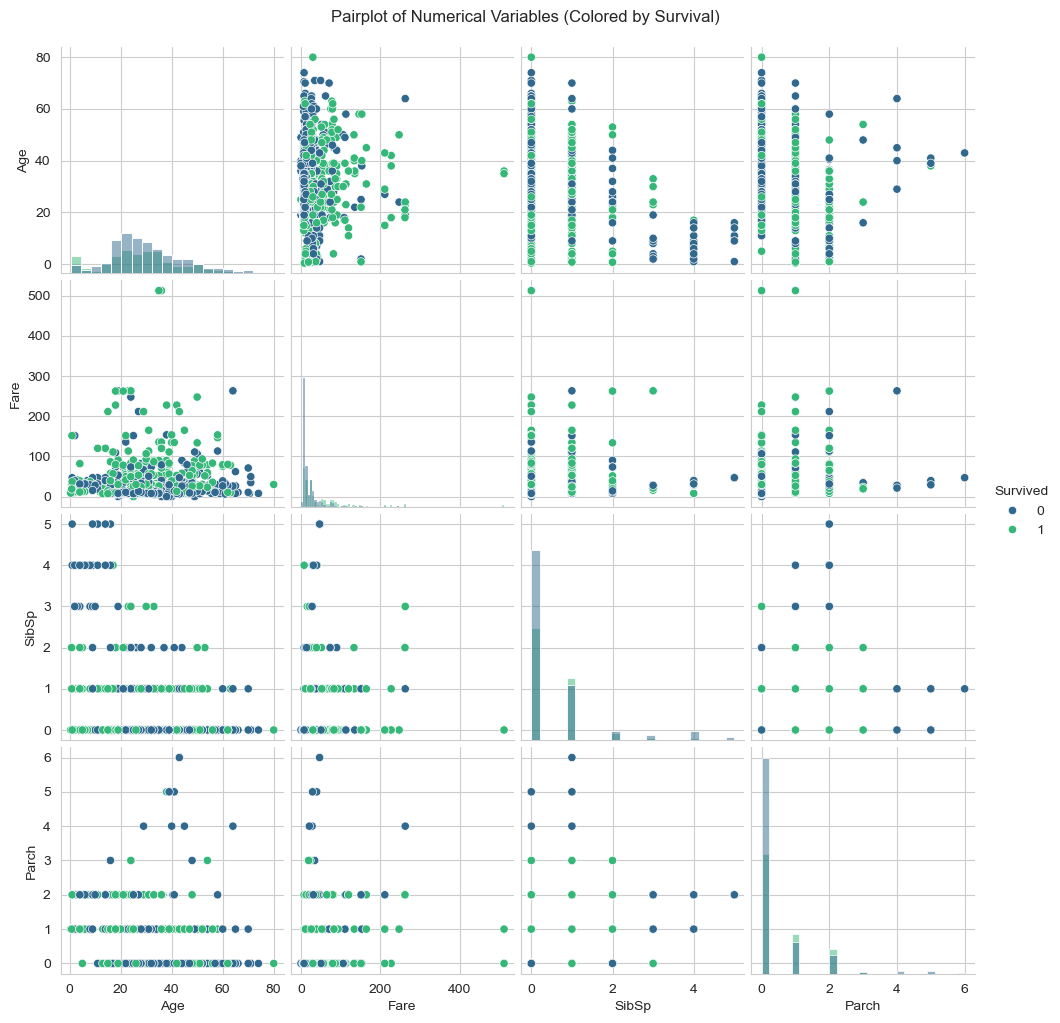

In [9]:
# b. sns.pairplot() - Relationships between numerical variables
print("=== PAIRPLOT - RELATIONSHIPS BETWEEN NUMERICAL VARIABLES ===")

# Select numerical columns for pairplot
numerical_cols = ['Age', 'Fare', 'SibSp', 'Parch', 'Survived']
pairplot_data = df[numerical_cols].dropna()

sns.pairplot(pairplot_data, hue='Survived', diag_kind='hist', palette='viridis')
plt.suptitle('Pairplot of Numerical Variables (Colored by Survival)', y=1.02)
plt.show()

**Observations from Pairplot:**
- **Age vs Fare**: Younger passengers tend to have lower fares
- **Survival Patterns**: Clear clusters in some variable combinations
- **SibSp vs Parch**: Positive correlation (families traveling together)
- **Diagonal histograms**: Show distribution differences between survivors/non-survivors

=== CORRELATION HEATMAP ===


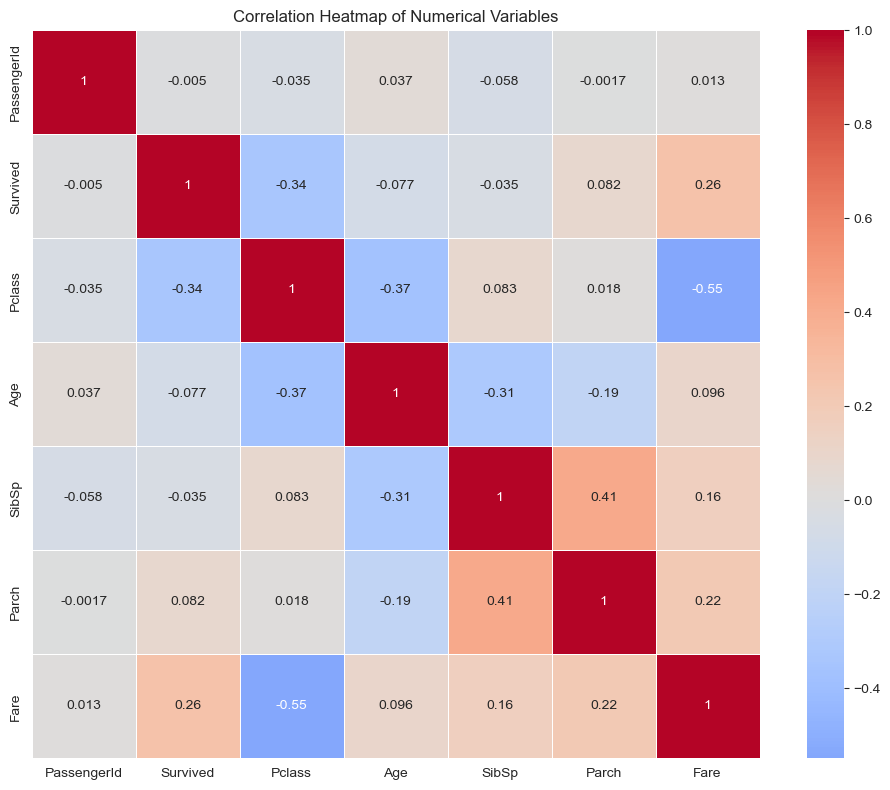

In [10]:
# b. sns.heatmap() - Correlation matrix
print("=== CORRELATION HEATMAP ===")

# Calculate correlation matrix
correlation_matrix = df.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
           square=True, linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables')
plt.tight_layout()
plt.show()

**Observations from Heatmap:**
- **Strong positive correlation**: Pclass vs Fare (-0.55) - Higher class = Higher fare
- **Moderate correlations**: SibSp vs Parch (0.41) - Families traveling together
- **Survival correlations**: Positive with Fare (0.26), Negative with Pclass (-0.34)
- **Weak correlations**: Most other variable pairs show weak relationships

## C & D. Identify Relationships, Trends & Basic Plots
Histograms, Boxplots, Scatterplots

=== HISTOGRAMS ===


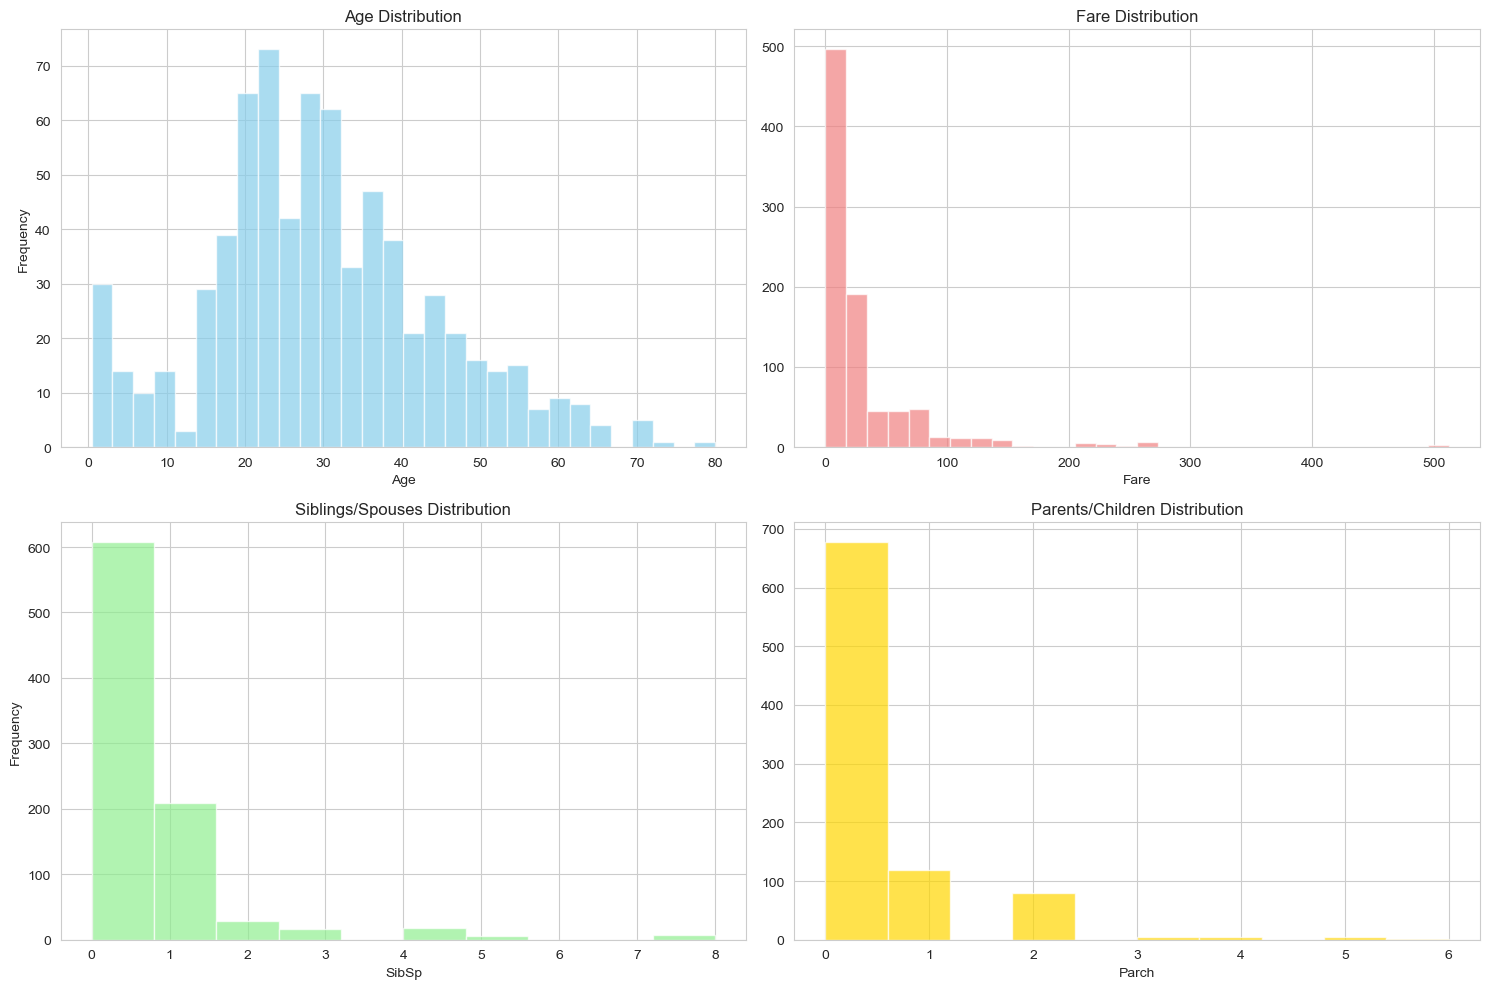

In [11]:
# d. Histograms - Distribution of numerical variables
print("=== HISTOGRAMS ===")

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Age distribution
df['Age'].hist(bins=30, ax=axes[0,0], color='skyblue', alpha=0.7)
axes[0,0].set_title('Age Distribution')
axes[0,0].set_xlabel('Age')
axes[0,0].set_ylabel('Frequency')

# Fare distribution
df['Fare'].hist(bins=30, ax=axes[0,1], color='lightcoral', alpha=0.7)
axes[0,1].set_title('Fare Distribution')
axes[0,1].set_xlabel('Fare')

# SibSp distribution
df['SibSp'].hist(bins=10, ax=axes[1,0], color='lightgreen', alpha=0.7)
axes[1,0].set_title('Siblings/Spouses Distribution')
axes[1,0].set_xlabel('SibSp')
axes[1,0].set_ylabel('Frequency')

# Parch distribution
df['Parch'].hist(bins=10, ax=axes[1,1], color='gold', alpha=0.7)
axes[1,1].set_title('Parents/Children Distribution')
axes[1,1].set_xlabel('Parch')

plt.tight_layout()
plt.show()

**Observations from Histograms:**
- **Age**: Right-skewed, most passengers between 20-40 years
- **Fare**: Highly right-skewed, most fares under $50, few very high fares
- **SibSp**: Most passengers traveled alone (0 siblings/spouses)
- **Parch**: Most passengers had no parents/children aboard

=== BOXPLOTS ===


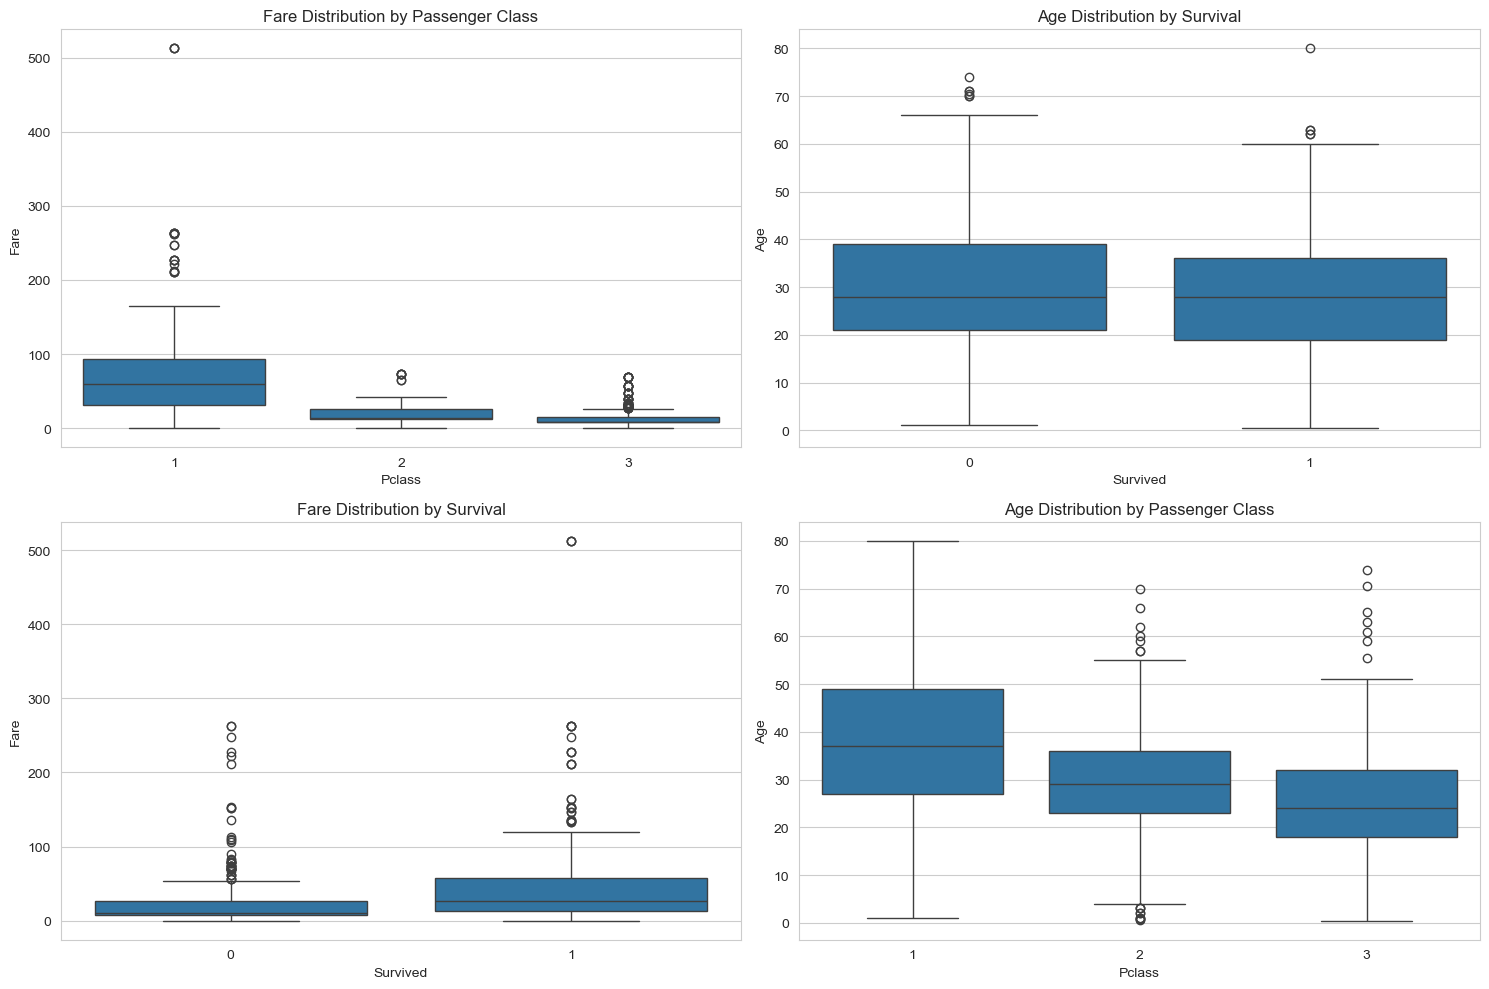

In [12]:
# d. Boxplots - Distribution and outliers
print("=== BOXPLOTS ===")

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Fare by Pclass
sns.boxplot(data=df, x='Pclass', y='Fare', ax=axes[0,0])
axes[0,0].set_title('Fare Distribution by Passenger Class')

# Age by Survival
sns.boxplot(data=df, x='Survived', y='Age', ax=axes[0,1])
axes[0,1].set_title('Age Distribution by Survival')

# Fare by Survival
sns.boxplot(data=df, x='Survived', y='Fare', ax=axes[1,0])
axes[1,0].set_title('Fare Distribution by Survival')

# Age by Pclass
sns.boxplot(data=df, x='Pclass', y='Age', ax=axes[1,1])
axes[1,1].set_title('Age Distribution by Passenger Class')

plt.tight_layout()
plt.show()

**Observations from Boxplots:**
- **Fare by Pclass**: Clear hierarchy - 1st class pays most, 3rd class least
- **Age by Survival**: Similar median age, but survivors have more children (lower quartile)
- **Fare by Survival**: Survivors paid significantly higher fares
- **Age by Pclass**: 1st class passengers tend to be older than 3rd class

=== SCATTERPLOTS ===


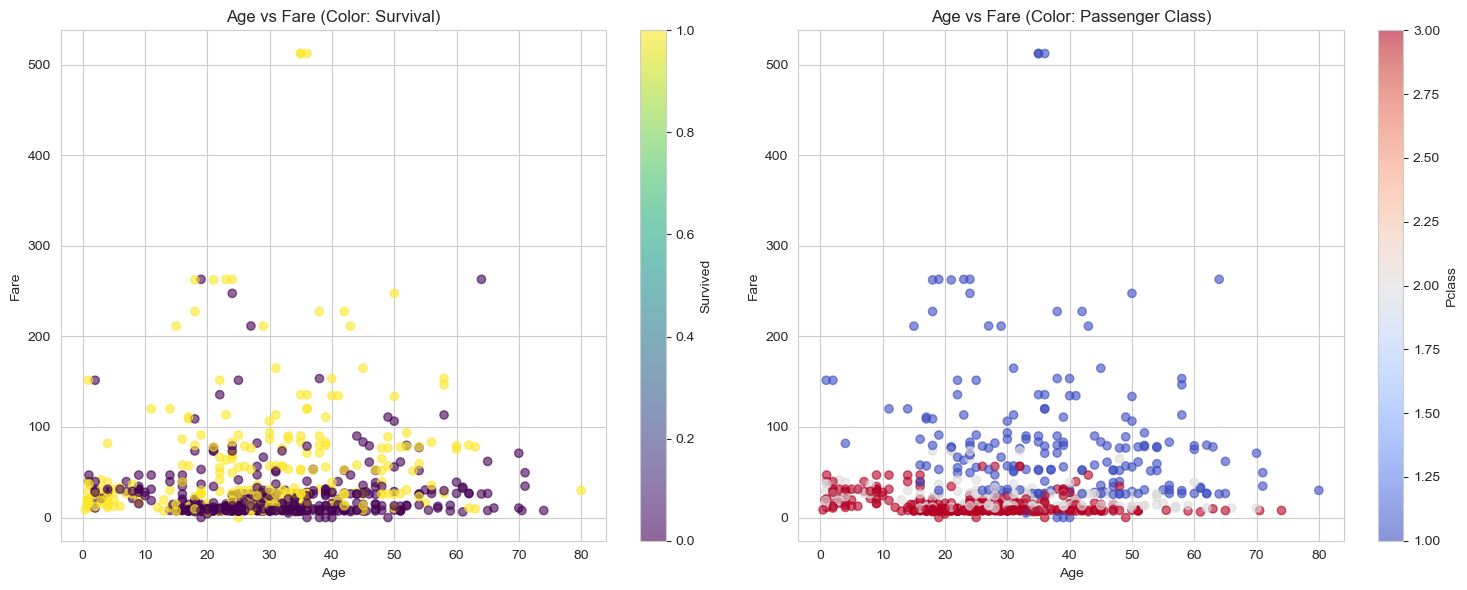

In [13]:
# d. Scatterplots - Relationships between variables
print("=== SCATTERPLOTS ===")

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Age vs Fare colored by Survival
scatter1 = axes[0].scatter(df['Age'], df['Fare'], c=df['Survived'], 
                         cmap='viridis', alpha=0.6)
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Fare')
axes[0].set_title('Age vs Fare (Color: Survival)')
plt.colorbar(scatter1, ax=axes[0], label='Survived')

# Age vs Fare colored by Pclass
scatter2 = axes[1].scatter(df['Age'], df['Fare'], c=df['Pclass'], 
                         cmap='coolwarm', alpha=0.6)
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Fare')
axes[1].set_title('Age vs Fare (Color: Passenger Class)')
plt.colorbar(scatter2, ax=axes[1], label='Pclass')

plt.tight_layout()
plt.show()

**Observations from Scatterplots:**
- **Age vs Fare**: Most high fares are concentrated in younger to middle-aged passengers
- **Survival Pattern**: Higher fare passengers (top of plot) more likely to survive
- **Pclass Pattern**: Clear vertical stratification - higher classes paid more across all ages
- **Outliers**: Few very high fares ($500+) across different age groups

=== SURVIVAL ANALYSIS ===


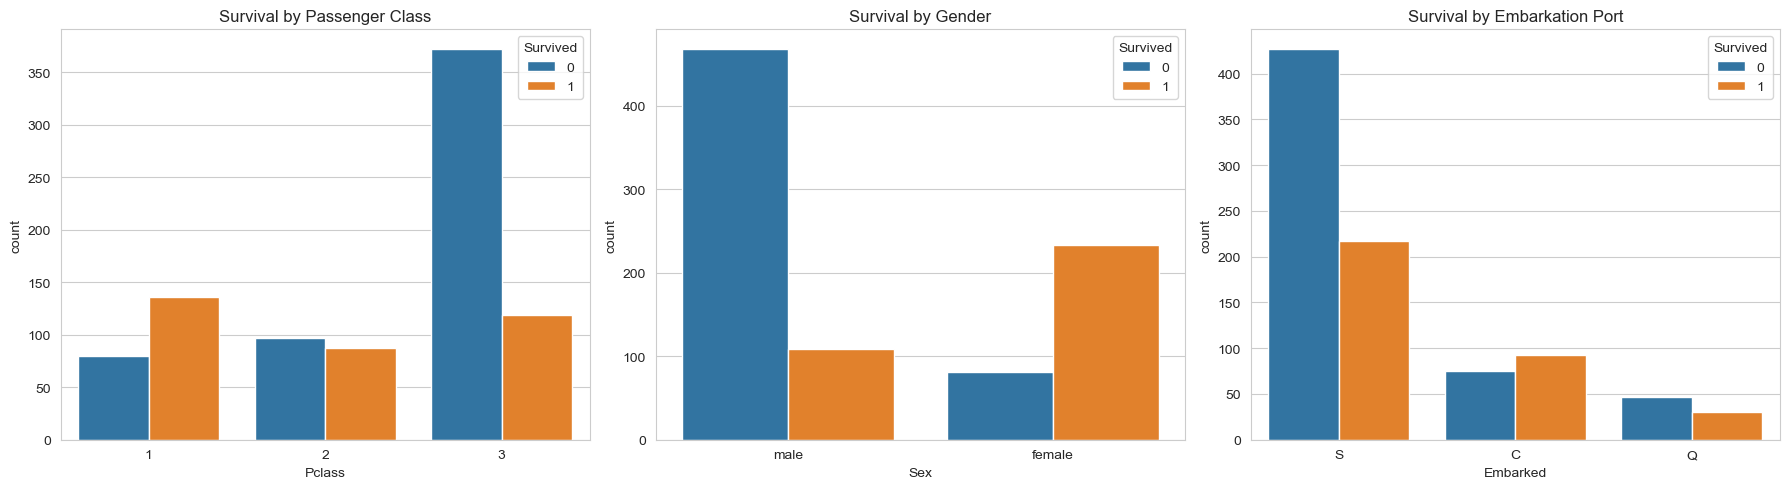

In [14]:
# Additional visualizations with observations
print("=== SURVIVAL ANALYSIS ===")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Survival by Pclass
sns.countplot(data=df, x='Pclass', hue='Survived', ax=axes[0])
axes[0].set_title('Survival by Passenger Class')

# Survival by Sex
sns.countplot(data=df, x='Sex', hue='Survived', ax=axes[1])
axes[1].set_title('Survival by Gender')

# Survival by Embarked
sns.countplot(data=df, x='Embarked', hue='Survived', ax=axes[2])
axes[2].set_title('Survival by Embarkation Port')

plt.tight_layout()
plt.show()

**Observations from Survival Analysis:**
- **Pclass**: 1st class had highest survival rate (>60%), 3rd class lowest (<25%)
- **Gender**: Females had dramatically higher survival rate (>70%) vs males (<20%)
- **Embarkation**: Cherbourg (C) passengers had highest survival rate
- **"Women and children first"**: Clearly evident in the data

## F. Summary of Findings

### Key Insights:

1. **Survival Rate**: Overall 38.4% survival rate (342/891)

2. **Demographics**:
   - Most passengers: 20-40 years old, 3rd class, male
   - Average age: 29.7 years
   - Average fare: $32.20 (highly skewed)

3. **Strong Survival Predictors**:
   - **Gender**: Female survival rate >70% vs Male <20%
   - **Passenger Class**: 1st class >60% vs 3rd class <25%
   - **Fare**: Higher fare correlated with better survival chances

4. **Important Relationships**:
   - Pclass and Fare strongly correlated (-0.55)
   - Family size (SibSp + Parch) shows moderate correlation
   - Age has weak correlation with survival

5. **Notable Patterns**:
   - "Women and children first" policy clearly visible
   - Wealthier passengers (higher fare/class) had priority
   - Most passengers traveled alone

### Business Implications:
- Passenger class and gender were the strongest factors in survival
- Economic status played significant role in survival chances
- Family size had moderate impact on survival rates

In [15]:
# Final summary statistics
print("=== FINAL SUMMARY STATISTICS ===")
print(f"Total passengers: {len(df)}")
print(f"Survival rate: {(df['Survived'].mean()*100):.1f}%")
print(f"Average age: {df['Age'].mean():.1f} years")
print(f"Average fare: ${df['Fare'].mean():.2f}")
print(f"Most common class: {df['Pclass'].mode()[0]}rd class")
print(f"Gender distribution: {(df['Sex'].value_counts(normalize=True)*100).round(1).to_dict()}")

# Missing data summary
print(f"\nMissing data:")
for col in df.columns:
    missing = df[col].isnull().sum()
    if missing > 0:
        print(f"  {col}: {missing} ({missing/len(df)*100:.1f}%)")

=== FINAL SUMMARY STATISTICS ===
Total passengers: 891
Survival rate: 38.4%
Average age: 29.7 years
Average fare: $32.20
Most common class: 3rd class
Gender distribution: {'male': 64.8, 'female': 35.2}

Missing data:
  Age: 177 (19.9%)
  Cabin: 687 (77.1%)
  Embarked: 2 (0.2%)
